# GCN in a transductive setting for Node betweenness

* Load graph 
* Compute (or get precomputed) edge betweenness
* transform graph
* compute node_betweennesss on this new graph
* transfrom back and replace edge betweennesses by computed node betweenness on transofrmed graph
* DO they match?

# 1. Codebase

In [21]:
%load_ext autoreload
%autoreload 2
from pprint import pprint
from torch.nn import *
from TFM_node_betweenness_models import MyNet,Net1,Net2,Net3,Net4,Net5,Net6
from TFM_node_betweenness_training import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Analysis of vis_../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_eb.pickle Dataset-----------------------------------
number of graphs in the dataset:  3
num classes:  1
num features:  1
<class 'torch_geometric.data.data.Data'>

Draw
0.02525252476334572
tensor(0.0253)


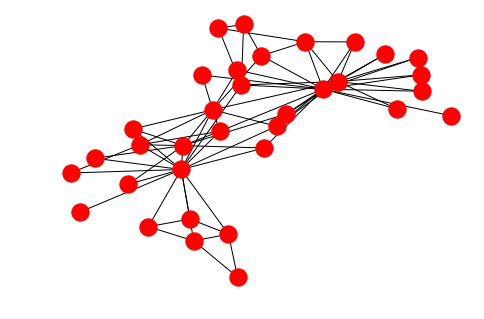

In [4]:
# load graph
dname='../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_eb.pickle'
dataset = loadDataset(collection='MyOwnDataset2',name=dname)
inspectGraphDataset(dataset, 'vis_'+dname)


In [22]:
# see precompute edge betweenness
data = dataset.data
#print(data.x)
print("precomputed edge betweenness",data.y)
print("makes sense, since the len is:",len(data.y))
print("Possible errors: length is n+1?, and round() has been used and should not!")
print("Let's used the new computed edge betweeness")


# transform back to NX
g = pyTorchGeometricDatasetToNx(data)

# verify with computed edge betweenness
print("nodes length is ",len(list(g.nodes().keys())))
print("edges length is ",len(list(g.edges().keys())))
eb = nx.edge_betweenness_centrality(g)
print("len() computed edge betweeness", len(eb))
print("Edge betweenness :")
pprint(eb)

precomputed edge betweenness tensor([0.0253, 0.0778, 0.0205, 0.0523, 0.0781, 0.0781, 0.0228, 0.0742, 0.0523,
        0.0588, 0.0465, 0.0424, 0.0401, 0.0459, 0.0401, 0.1273, 0.0232, 0.0077,
        0.0074, 0.0124, 0.0187, 0.0146, 0.0187, 0.0323, 0.0224, 0.0252, 0.0092,
        0.0308, 0.0076, 0.0412, 0.0228, 0.0690, 0.0034, 0.0123, 0.0149, 0.0048,
        0.0030, 0.0030, 0.0048, 0.0294, 0.0294, 0.0098, 0.0304, 0.0404, 0.0678,
        0.0594, 0.0401, 0.0421, 0.0149, 0.0414, 0.0534, 0.0171, 0.0268, 0.0296,
        0.0105, 0.0187, 0.0305, 0.0246, 0.0241, 0.0241, 0.0241, 0.0241, 0.0241,
        0.0223, 0.0233, 0.0082, 0.0347, 0.0347, 0.0347, 0.0347, 0.0347, 0.0327,
        0.0543, 0.0298, 0.0198, 0.0067, 0.0042, 0.0045])
makes sense, since the len is: 78
Possible errors: length is n+1?, and round() has been used and should not!
Let's used the new computed edge betweeness
nodes length is  34
edges length is  77
len() computed edge betweeness 77
Edge betweenness :
{('0', '1'): 0.0252525252525

In [34]:
edges_dict[('0','1')]

('0', '1')

In [60]:
# transform graph 

edges_dict = dict(g.edges())
for e in edges_dict.keys():
    edges_dict[e]=e

edges_dict_new = {}
edge_renaming = {}
i=0
for k,v in edges_dict.items():
    edges_dict_new[i]=v
    edge_renaming[i]=k
    i+=1
    
# renamed edges to integer
# pprint(edges_dict_new)
edges_dict_original = edges_dict
edges_dict = edges_dict_new


edge_neighbors= [[],[]]
for edge in edges_dict.keys():
    #print("edge",edge)
    for node in edges_dict[edge]:
        #print("node",node)
        for edge2 in edges_dict.keys():
            if edge2 != edge and ( edges_dict[edge2][0] == node or edges_dict[edge2][1] == node ):
                
                edge_neighbors[0].append(edge)
                edge_neighbors[1].append(edge2)

print(edge_neighbors[0][:50])
print()
print(edge_neighbors[1][:50])

# generate the graph with: nodes in edges_dict,  edges in edge_neighbors
# write edgelist to disk
with open('temp/edgetonode.txt','w') as f:
    for j in range(len(edge_neighbors[0])):
        f.write(str(edge_neighbors[0][j]) + ' ' + str(edge_neighbors[1][j]) + '\n')
            
    
    
G = nx.read_edgelist('temp/edgetonode.txt', nodetype=int)
print()
print("Read graph")
print(G.nodes())
print()
print()
print(G.edges())
# there's a difference, and that's that the edges are note repeated as before.. but I think it's ok

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 3]

Read graph
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 24), (1, 25), (1, 26), (1

In [61]:
# compute node betweenness
nb = nx.betweenness_centrality(G)
pprint(nb)

{0: 0.03466846798425746,
 1: 0.07166609895695766,
 2: 0.019708197260828838,
 3: 0.023976608187134506,
 4: 0.048128654970760236,
 5: 0.048128654970760236,
 6: 0.011646616541353386,
 7: 0.06246740123808183,
 8: 0.023976608187134506,
 9: 0.0,
 10: 0.004538011695906431,
 11: 0.034329083163339845,
 12: 0.004076441102756892,
 13: 0.0281546445415328,
 14: 0.004076441102756892,
 15: 0.1026826645152103,
 16: 0.026998664590769845,
 17: 0.0069092428039796445,
 18: 0.00331077694235589,
 19: 0.011254254841974136,
 20: 0.000985797827903091,
 21: 0.009939883053918136,
 22: 0.000985797827903091,
 23: 0.025348003523442093,
 24: 0.01906428318270423,
 25: 0.009450973926043185,
 26: 0.010643425431351126,
 27: 0.005944271128481654,
 28: 0.009442878758668232,
 29: 0.035207654540363224,
 30: 0.010902630507893666,
 31: 0.0731273774274697,
 32: 0.0013450292397660817,
 33: 0.0004678362573099415,
 34: 0.012917483101693631,
 35: 0.000935672514619883,
 36: 0.0004093567251461988,
 37: 0.0009941520467836255,
 38: 0.

In [67]:
# untransform but linking the node betweenness


eb_from_transform={}
for k,v in nb.items():
    eb_from_transform[edge_renaming[k]]=v
    # show difference
    print("orig          :",k,edge_renaming[k],eb[edge_renaming[k]])
    print("from transform:",k,edge_renaming[k],eb_from_transform[edge_renaming[k]])
    print()
    
#eb_from_transform

orig          : 0 ('0', '1') 0.025252525252525245
from transform: 0 ('0', '1') 0.03466846798425746

orig          : 1 ('0', '2') 0.07778768072885717
from transform: 1 ('0', '2') 0.07166609895695766

orig          : 2 ('0', '3') 0.02049910873440285
from transform: 2 ('0', '3') 0.019708197260828838

orig          : 3 ('0', '4') 0.0522875816993464
from transform: 3 ('0', '4') 0.023976608187134506

orig          : 4 ('0', '5') 0.07813428401663694
from transform: 4 ('0', '5') 0.048128654970760236

orig          : 5 ('0', '6') 0.07813428401663695
from transform: 5 ('0', '6') 0.048128654970760236

orig          : 6 ('0', '7') 0.022854596384008143
from transform: 6 ('0', '7') 0.011646616541353386

orig          : 7 ('0', '8') 0.07424808307161251
from transform: 7 ('0', '8') 0.06246740123808183

orig          : 8 ('0', '10') 0.0522875816993464
from transform: 8 ('0', '10') 0.023976608187134506

orig          : 9 ('0', '11') 0.058823529411764705
from transform: 9 ('0', '11') 0.0

orig          :

# Conclusion 1: 
The edge betwenness cannot be computed bry transforming the graph and computing the node betweenness

# 2. Experiment 2: edge betweenness as min of node betweenneses

Analysis of vis_../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_eb.pickle Dataset-----------------------------------
number of graphs in the dataset:  3
num classes:  1
num features:  1
<class 'torch_geometric.data.data.Data'>

Draw
0.02525252476334572
tensor(0.0253)


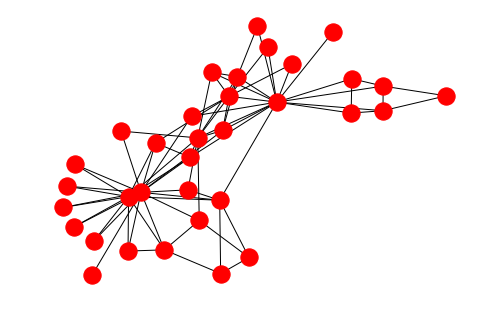

In [69]:
# load graph
# load graph
dname='../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_eb.pickle'
dataset = loadDataset(collection='MyOwnDataset2',name=dname)
inspectGraphDataset(dataset, 'vis_'+dname)
data = dataset.data
# transform back to NX
g = pyTorchGeometricDatasetToNx(data)

In [72]:
# compute node and edge betweeness
eb = nx.edge_betweenness_centrality(g,normalized=False)
nb = nx.betweenness_centrality(g,normalized=False)

# verify with computed edge betweenness
pprint(eb)
pprint(nb)


{('0', '1'): 14.166666666666664,
 ('0', '10'): 29.333333333333332,
 ('0', '11'): 33.0,
 ('0', '12'): 26.099999999999994,
 ('0', '13'): 23.77539682539683,
 ('0', '17'): 22.509523809523817,
 ('0', '19'): 25.775396825396832,
 ('0', '2'): 43.63888888888887,
 ('0', '21'): 22.509523809523817,
 ('0', '3'): 11.5,
 ('0', '31'): 71.397619047619,
 ('0', '4'): 29.333333333333332,
 ('0', '5'): 43.83333333333333,
 ('0', '6'): 43.833333333333336,
 ('0', '7'): 12.82142857142857,
 ('0', '8'): 41.65317460317462,
 ('1', '13'): 6.964285714285715,
 ('1', '17'): 10.490476190476189,
 ('1', '19'): 8.214285714285715,
 ('1', '2'): 13.033333333333335,
 ('1', '21'): 10.490476190476189,
 ('1', '3'): 4.333333333333333,
 ('1', '30'): 18.114285714285714,
 ('1', '7'): 4.178571428571428,
 ('13', '33'): 38.09206349206349,
 ('19', '33'): 33.323015873015876,
 ('2', '13'): 4.309523809523808,
 ('2', '27'): 23.13730158730159,
 ('2', '28'): 12.809523809523807,
 ('2', '3'): 12.583333333333332,
 ('2', '32'): 38.520634920634926,

# Conclusion 2:
Edge betwenness cannot be infered from node betweenness

In [ ]:
# print edge, nodes, edge betewenness, each node betwenness <- edgeb = min(nb,nb2)?